In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('bdastudents.csv', sep=';')

In [4]:
dataset.describe()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,0.706897,2.603448,2.387931,1.522989,1.970307,0.264368,0.113985,0.613027,0.210728,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,1.091954,1.100575,1.117816
std,1.239975,0.455404,1.124907,1.099938,0.731727,0.834353,0.656142,0.317945,0.487291,0.408021,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,0.423622,0.453430,0.509270
min,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000
50%,17.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000
75%,18.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000,1.000000,1.000000
max,22.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.000000,2.000000,2.000000


In [5]:
# 2. nel dataset ci sono 1044 istanze

In [8]:
dataset.groupby(['school']).size()

school
GP    772
MS    272
dtype: int64

In [10]:
dataset.groupby(['sex']).size()

sex
F    591
M    453
dtype: int64

In [11]:
# 2. il dataset è fortemente sbilanciato rispetto alle due scuole ma sufficientemente bilanciato per quanto
# riguarda il sesso degli studenti

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe486177890>,
      dtype=object)

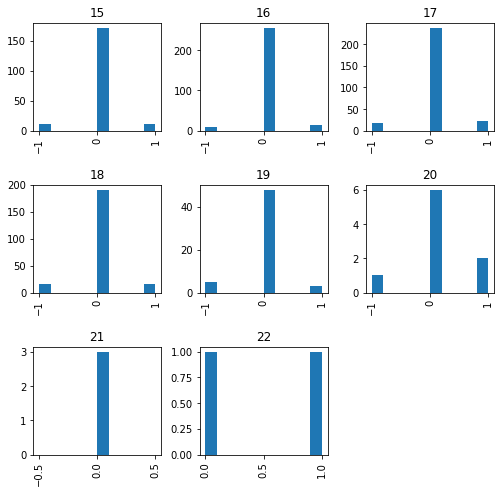

In [14]:
# 3.
dataset['GRate'] = dataset['G2'] - dataset['G1']
dataset['GRate'].hist(by=dataset['age'], figsize=(8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4861ab490>,
      dtype=object)

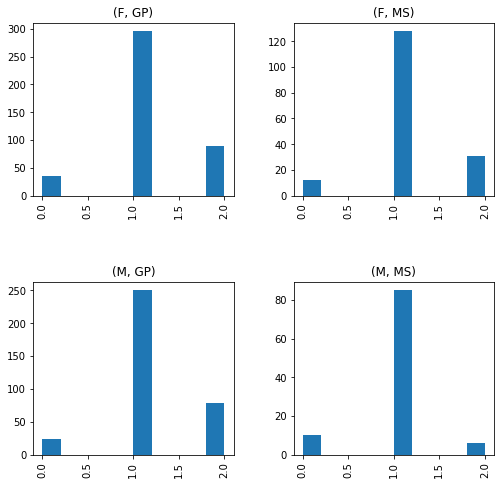

In [16]:
dataset['G3'].hist(by=[dataset['sex'], dataset['school']], figsize=(8, 8))

In [ ]:
# 4. la distribuzione della valutazione 'G3' risulta omogenea tra i sessi e le due scuole, eccezion fatta per
# gli studenti di sesso maschile della scuola 'MS' che risultano avere una minor percentuale di valutazioni alte

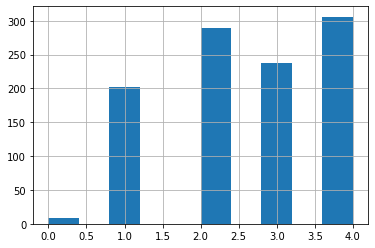

In [17]:
dataset['Medu'].hist()

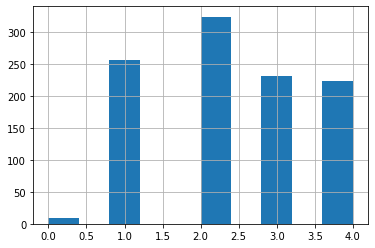

In [20]:
dataset['Fedu'].hist()

In [ ]:
# 5. come è possibile notare dai grafici, le madri degli studenti tendono ad avere in maggior numero un livello
# di educazione più alto rispetto ai padri

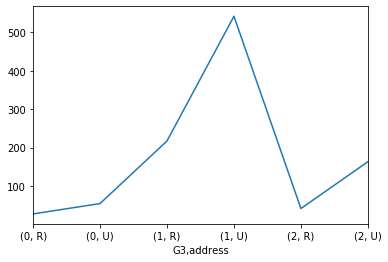

In [23]:
dataset['G3'].groupby([dataset['G3'], dataset['address']]).count().plot()

In [24]:
# 6. l'istruzione visualizza, raggruppati per score e località di abitazione, il punteggio finale degli studenti.
# dal grafico si potrebbe dedurre che gli studenti di aree urbane abbiano voti più alti rispetto agli studenti
# che vivono in aree rurali, ma in realtà si può solo dedurre che i primi sono in numero maggiore rispetto ai
# secondi. tramite questa istruzione non è quindi possibile determinare una correlazione tra zona di residenza
# e voto finale.

In [25]:
# trasformazione e predizione

In [54]:
# 1.
numeric = dataset.select_dtypes(include='number')
reduced = dataset.loc[:, (dataset.columns == 'G1') | (dataset.columns == 'G2') | (dataset.columns == 'G3')]
less_reduced = numeric.loc[:, (numeric.columns != 'G1') & (numeric.columns != 'G2')]

In [68]:
# 2.
from sklearn.model_selection import train_test_split

datasets = [numeric, reduced, less_reduced]
names = ['numeric', 'reduced', 'less_reduced']
X_train = []
X_test = []
y_train = []
y_test = []

for ds in datasets:
    X = ds.loc[:, ds.columns != 'G3']
    y = ds.loc[:, ds.columns == 'G3']
    tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(X, y, train_size=2/3, test_size=1/3)
    X_train.append(tmp_X_train)
    X_test.append(tmp_X_test)
    y_train.append(tmp_y_train)
    y_test.append(tmp_y_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
scores = []
y_preds = []

for idx, el in enumerate(datasets):
    model.fit(X_train[idx], y_train[idx].values.ravel())
    y_pred = model.predict(X_test[idx])
    y_preds.append(y_pred)
    scores.append(accuracy_score(y_test[idx], y_pred))
    
    print(f'results for dataset {names[idx]}')
    print(f'accuracy: {scores[idx]}')
    print(f'confusion matrix:\n {confusion_matrix(y_test[idx], y_preds[idx])}')

results for dataset numeric
accuracy: 0.8850574712643678
confusion matrix:
 [[  2  24   0]
 [  0 247   1]
 [  0  15  59]]
results for dataset reduced
accuracy: 0.8649425287356322
confusion matrix:
 [[  0  30   0]
 [  0 250   2]
 [  0  15  51]]
results for dataset less_reduced
accuracy: 0.7298850574712644
confusion matrix:
 [[  0  18   1]
 [  2 242   6]
 [  0  67  12]]


/home/enrico/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enrico/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/enrico/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/enrico/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/enrico/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

In [ ]:
# dalla confusion matrix si deduce che in tutti i tre dataset la predizione della classe b (ovvero un valore)
# di G3 pari a 1 è fortemente errata: nei primi due dataset si ha una dispersione sia sulla classe a che c
# (valori di G3 pari a 0 e 2 rispettivamente) e nel terzo è particolarmente pronunciata sulla classe c

In [77]:
# 3.

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10)
model = DecisionTreeClassifier()
kf_dt_scores = []

for ds in datasets:
    X = ds.loc[:, ds.columns != 'G3']
    y = ds.loc[:, ds.columns == 'G3']
    kf_dt_scores.append(cross_val_score(model, X, y, cv=cv).mean())
    
kf_dt_scores

[0.8419139194139194, 0.9109432234432235, 0.6648717948717948]

In [ ]:
# la valutazione tramite 10-Fold cross validation è più significativa in quanto il modello viene allenato su
# più dataset di training ed è più sensibile nella predizione verso dati non visti durante il training

In [88]:
# 4.
numeric2 = numeric.copy(deep=True)
numeric2['age_range'] = pd.cut(numeric2['age'], 3, labels=np.arange(0, 3))
numeric2 = numeric2.drop(columns=['age'])

cv = KFold(n_splits=10)
model = DecisionTreeClassifier()
X = numeric2.loc[:, numeric2.columns != 'G3']
y = numeric2.loc[:, numeric2.columns == 'G3']

print(cross_val_score(model, X, y, cv=cv).mean())

0.83996336996337


In [92]:
dummies = pd.get_dummies(numeric2['age_range'], prefix='age')
numeric2 = numeric2.join(dummies)

ValueError: columns overlap but no suffix specified: Index(['age_0', 'age_1', 'age_2'], dtype='object')

In [93]:
cv = KFold(n_splits=10)
model = DecisionTreeClassifier()
X = numeric2.loc[:, numeric2.columns != 'G3']
y = numeric2.loc[:, numeric2.columns == 'G3']

print(cross_val_score(model, X, y, cv=cv).mean())

0.8466849816849816


In [103]:
# 5.
mjob_dummies = pd.get_dummies(dataset['Mjob'], prefix='mjob')
fjob_dummies = pd.get_dummies(dataset['Fjob'], prefix='fjob')
numeric = numeric.join(mjob_dummies).join(fjob_dummies)

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher,fjob_at_home,fjob_health,fjob_other,fjob_services,fjob_teacher
0,18,1,4,4,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,17,1,1,1,1,2,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,15,0,1,1,1,2,3,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,15,1,4,2,1,3,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,16,1,3,3,1,2,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,1,2,3,1,3,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1040,18,0,3,1,1,2,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1041,18,1,1,1,2,2,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1042,17,0,3,1,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [104]:
cv = KFold(n_splits=10)
model = DecisionTreeClassifier()
X = numeric.loc[:, numeric.columns != 'G3']
y = numeric.loc[:, numeric.columns == 'G3']

print(cross_val_score(model, X, y, cv=cv).mean())

0.8438186813186812


In [120]:
# 6.
numeric_gp = dataset.select_dtypes(include='number').loc[dataset['school'] == 'GP']
numeric_ms = dataset.select_dtypes(include='number').loc[dataset['school'] == 'MS']

model_gp = DecisionTreeClassifier()
model_ms = DecisionTreeClassifier()

X_gp = numeric_gp.loc[:, numeric_gp.columns != 'G3']
y_gp = numeric_gp.loc[:, numeric_gp.columns == 'G3']
X_ms = numeric_ms.loc[:, numeric_ms.columns != 'G3']
y_ms = numeric_ms.loc[:, numeric_ms.columns == 'G3']

X_train_gp, X_test_gp, y_train_gp, y_test_gp = train_test_split(X_gp, y_gp, train_size=2/3, test_size=1/3)
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(X_ms, y_ms, train_size=2/3, test_size=1/3)

model_gp.fit(X_train_gp, y_train_gp.values.ravel())
model_ms.fit(X_train_ms, y_train_ms.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [137]:
X_test = np.concatenate([X_test_gp, X_test_ms])
y_test = np.concatenate([y_test_gp, y_test_ms])

y_pred_gp = model_gp.predict(X_test)
y_pred_ms = model_ms.predict(X_test)

print(f'accuracy score for gp model: {accuracy_score(y_test, y_pred_gp)}')
print(f'accuracy score for ms model: {accuracy_score(y_test, y_pred_ms)}')

accuracy score for gp model: 0.839541547277937
accuracy score for ms model: 0.8911174785100286


In [ ]:
# 7.
